# Examples of ReGraph versioning (VersionedGraph and VersionedHierarchy)

ReGraph implements a framework for version control of graph transformations

- Commit 
- Branch
- Merge branches
- Rollback

In [1]:
import networkx as nx

from regraph.audit import VersionedGraph
from regraph.rules import Rule
from regraph import print_graph, plot_rule, plot_graph

Create a graph and pass it to the VersionedGraph wrapper that will take care of the version control.

In [2]:
graph_obj = nx.DiGraph()
g = VersionedGraph(graph_obj)

Now let's create a rule that adds to the graph two nodes connected with an edge and apply it. If we want the changes to be commited to the version control we rewrite through the `rewrite` method of a `VersioneGraph` object.

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


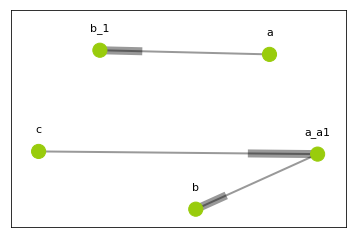

{'b': array([0.55826531, 0.        ]),
 'c': array([0.        , 0.36335591]),
 'a_a1': array([0.99099415, 0.34655557]),
 'a': array([0.8200934, 0.9738709]),
 'b_1': array([0.21769386, 1.        ])}

In [34]:
rule = Rule.from_transform(nx.DiGraph())
rule.inject_add_node("a")
rule.inject_add_node("b")
rule.inject_add_edge("a", "b")

rhs_instance, _ = g.rewrite(rule, {}, message="Add a -> b")
plot_graph(g.graph)

We create a new branch called "branch"

In [4]:
branch_commit = g.branch("branch")

In [5]:
print("Branches: ", g.branches())
print("Current branch '{}'".format(g.current_branch()))

Branches:  ['master', 'branch']
Current branch 'branch'


Apply a rule that clones the node 'b' to the current vesion of the graph (branch 'branch')

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


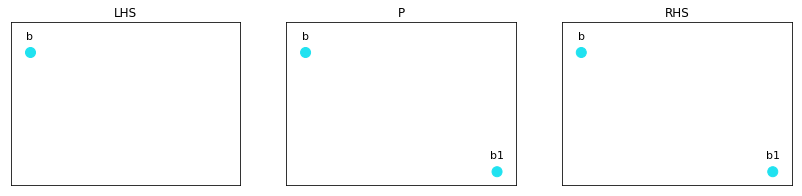

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


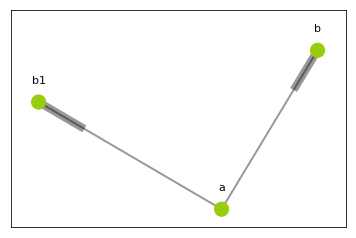

{'a': array([0.65578933, 0.        ]),
 'b': array([1.        , 0.74127651]),
 'b1': array([0.        , 0.49959628])}

In [6]:
pattern = nx.DiGraph()
pattern.add_node("b")
rule = Rule.from_transform(pattern)
rule.inject_clone_node("b")
plot_rule(rule)

g.rewrite(rule, {"b": rhs_instance["b"]}, message="Clone b")
plot_graph(g.graph)

Switch back to the 'master' branch

In [7]:
g.switch_branch("master")
print(g.current_branch())

master


Apply a rule that adds a loop form 'a' to itself, a new node 'c' and connects it with 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


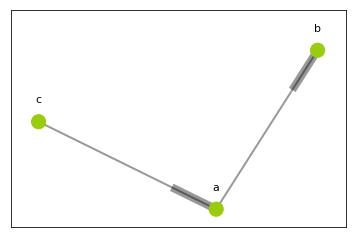

{'a': array([0.63647844, 0.        ]),
 'b': array([1.        , 0.81614985]),
 'c': array([0.       , 0.4490886])}

In [8]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("c")
rule.inject_add_edge("c", "a")
rule.inject_add_edge("a", "a")

rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Add c and c->a")
plot_graph(g.graph)

Create a new branch 'dev'

In [9]:
g.branch("dev")

'843a4fff-db65-47b1-86f7-579eeb278353'

In this branch remove an edge from 'c' to 'a' and merge two nodes together

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


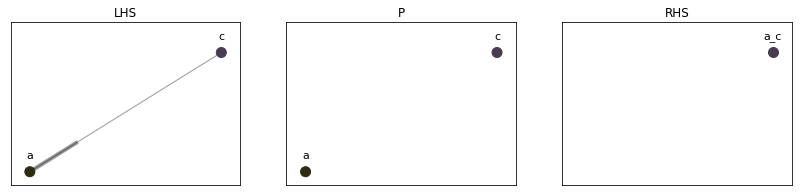

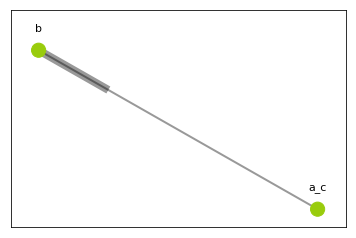

{'b': array([0.       , 0.1464714]), 'a_c': array([1., 0.])}

In [10]:
pattern = nx.DiGraph()
pattern.add_node("c")
pattern.add_node("a")
pattern.add_edge("c", "a")
rule = Rule.from_transform(pattern)
rule.inject_remove_edge("c", "a")
rule.inject_merge_nodes(["c", "a"])
plot_rule(rule)

g.rewrite(rule, {"a": rhs_instance["a"], "c": rhs_instance["c"]}, message="Merge c and a")
plot_graph(g.graph)

Switch back to the 'master' branch.

In [11]:
g.switch_branch("master")

Apply a rule that clones a node 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


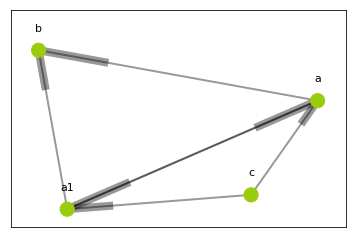

{'b': array([0., 1.]),
 'c': array([0.72609634, 0.09019639]),
 'a': array([0.95341396, 0.68288584]),
 'a1': array([0.09776283, 0.        ])}

In [12]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
_, rhs_clone = rule.inject_clone_node("a")
rhs_instance, rollback_commit = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Clone a")
plot_graph(g.graph)

Create a new branch 'test'

In [13]:
g.branch("test")

'68c296e8-481e-4d6c-96b3-fe2653e1a539'

In this branch apply the rule that adds a new node 'd' and connects it with an edge to one of the cloned 'a' nodes

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


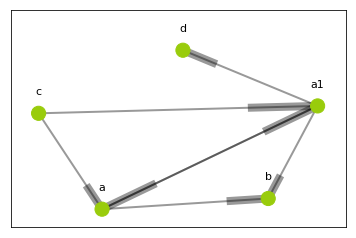

{'b': array([0.82295069, 0.06472531]),
 'c': array([0.        , 0.58103967]),
 'a': array([0.22742412, 0.        ]),
 'a1': array([1.       , 0.6257971]),
 'd': array([0.5173845 , 0.96332239])}

In [14]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_add_node("d")
rule.inject_add_edge("a", "d")
g.rewrite(rule, {"a": rhs_instance[rhs_clone]}, message="Add d -> clone of a")
plot_graph(g.graph)

Switch back to 'master'

In [15]:
g.switch_branch("master")

Remove a node 'a'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


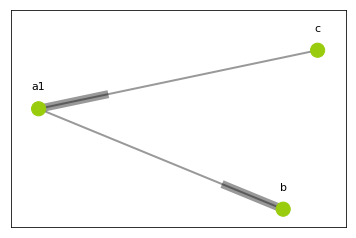

{'b': array([0.62054488, 0.        ]),
 'c': array([0.707915, 1.      ]),
 'a1': array([0.        , 0.63179403])}

In [17]:
pattern = nx.DiGraph()
pattern.add_node("a")
rule = Rule.from_transform(pattern)
rule.inject_remove_node("a")
rhs_instance, _ = g.rewrite(rule, {"a": rhs_instance["a"]}, message="Remove a")
plot_graph(g.graph)

Merge the branch 'dev' into 'master'

In [19]:
g.merge_with("dev")

'59ba8e56-dcd4-474f-af41-70104183bbb1'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


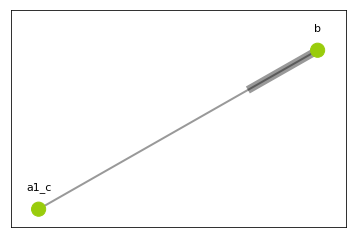

{'b': array([1.        , 0.23778338]), 'a1_c': array([0., 0.])}

In [20]:
plot_graph(g.graph)

Merge 'test' into 'master'

In [21]:
g.merge_with("test")

'54cdbcc2-daa1-454b-aeda-9d8a52182758'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


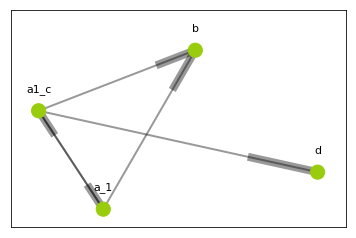

{'b': array([0.56163598, 0.95743634]),
 'a1_c': array([0.        , 0.59282624]),
 'd': array([1.        , 0.22320331]),
 'a_1': array([0.23188545, 0.        ])}

In [22]:
plot_graph(g.graph)

We can inspect the version control object in more details and look at its attribute `_revision_graph`, whose nodes represent the commits and whose edges represent graph deltas between different commits (basically, rewriting rules that constitute commits). Here we can see that on the nodes of the revision graph are stored branch names to which commits belong and user specified commit messages.

In [35]:
g.print_history()

2019-05-23 12:31:00.900945 ffa19ef1-cdf2-4714-b688-aab8e76967c7 master Initial commit
2019-05-23 12:31:01.143766 5024564f-e5b0-4df2-9b9b-1e904bed8f58 master Add a -> b
2019-05-23 12:31:01.254257 8df612ba-bce7-4f03-a175-a896e3e380e0 branch Created branch 'branch'
2019-05-23 12:31:01.621986 ce92b6f7-2904-4a26-ac70-0bf85a9c56ff master Add c and c->a
2019-05-23 12:31:01.735462 843a4fff-db65-47b1-86f7-579eeb278353 dev Created branch 'dev'
2019-05-23 12:31:01.981003 5a089397-4be2-4633-bbc2-4bda4807b883 dev Merge c and a
2019-05-23 12:31:02.136053 b9f9b726-1815-49b7-a189-a6b3b8dcfdc0 master Clone a
2019-05-23 12:31:03.755369 3ce3a729-6017-474c-ad4f-4a3289b24c0b master Merged branch 'branch' into 'master'
2019-05-23 12:31:21.049117 c9d6dd00-a0e1-48c8-a84e-1d0ad1433615 master Add a -> b


Now we can rollback to some previous commit (commit where we first cloned the node 'a')

In [24]:
g.rollback(rollback_commit)

Created the new head for 'dev'
Created the new head for 'master'


Branches:  ['master', 'branch', 'dev']
Current branch 'master'
Updated revision graph:
ffa19ef1-cdf2-4714-b688-aab8e76967c7 master Initial commit
5024564f-e5b0-4df2-9b9b-1e904bed8f58 master Add a -> b
8df612ba-bce7-4f03-a175-a896e3e380e0 branch Created branch 'branch'
cc5da219-c9e4-4fbd-9e67-b8eb793775e3 branch Clone b
ce92b6f7-2904-4a26-ac70-0bf85a9c56ff master Add c and c->a
843a4fff-db65-47b1-86f7-579eeb278353 dev Created branch 'dev'
5a089397-4be2-4633-bbc2-4bda4807b883 dev Merge c and a
b9f9b726-1815-49b7-a189-a6b3b8dcfdc0 master Clone a
Current graph object


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


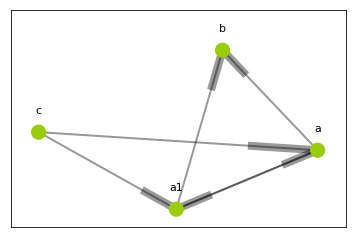


Nodes:

b  :  {}
a1  :  {}
a  :  {}
c  :  {}

Edges:

a1 -> b  :  {}
a1 -> a1  :  {}
a1 -> a  :  {}
a -> b  :  {}
a -> a1  :  {}
a -> a  :  {}
c -> a  :  {}
c -> a1  :  {}


In [25]:
print("Branches: ", g.branches())
print("Current branch '{}'".format(g.current_branch()))
print("Updated revision graph:")
g.print_history()
print("Current graph object")
plot_graph(g.graph)
print_graph(g.graph)

In [26]:
g.switch_branch("branch")

In [27]:
g.rollback(branch_commit)

Created the new head for 'branch'


In [36]:
g.print_history()

AttributeError: 'VersionedGraph' object has no attribute 'print_history'

{'master': 'b9f9b726-1815-49b7-a189-a6b3b8dcfdc0', 'branch': '8df612ba-bce7-4f03-a175-a896e3e380e0', 'dev': '5a089397-4be2-4633-bbc2-4bda4807b883'}


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


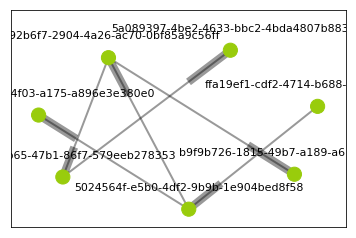

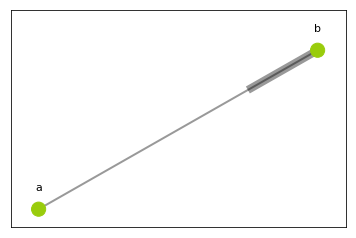

{'a': array([0., 0.]), 'b': array([0.74722462, 1.        ])}

In [29]:
print(g._heads)
plot_graph(g.graph)

In [30]:
g.switch_branch("master")

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


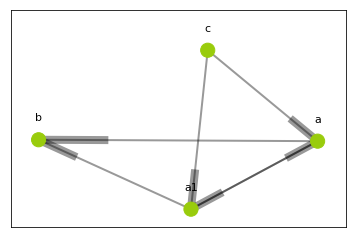

{'a': array([1.        , 0.42173442]),
 'b': array([0.       , 0.4304594]),
 'a1': array([0.54611565, 0.        ]),
 'c': array([0.60615502, 0.98545603])}

In [31]:
plot_graph(g.graph)

In [32]:
g.merge_with("branch")

'3ce3a729-6017-474c-ad4f-4a3289b24c0b'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


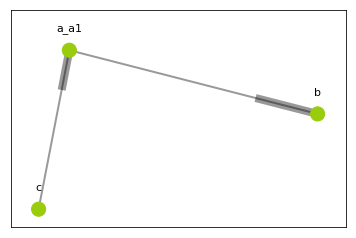

{'b': array([1.        , 0.51128119]),
 'c': array([0., 0.]),
 'a_a1': array([0.11017705, 0.85320382])}

In [33]:
plot_graph(g.graph)